# SUMMARIZATION TECHNIQUES

## USE OF DATASETS WITH GROUND TRUTH FOR COMPARING THE DIFFERENT SUMMARIZATION TECHNIQUES

### FIRST DATASET - QMSUM WITH DISCUSSION ABOUT PRODUCTS

In [1]:
import json
import pandas as pd

# Load the JSON data
with open('datasets/QMSum/data/Product/train/ES2002c.json', 'r') as f:
    data = json.load(f)


print(data.keys())
df_topics = pd.DataFrame(data['topic_list'])
df_query_list = pd.DataFrame(data['general_query_list'])
df_comments = pd.DataFrame(data['meeting_transcripts'])
print('--------------------------------------------------------------------------------------------------------------------')
print(df_comments)
print('--------------------------------------------------------------------------------------------------------------------')
print(df_topics)

dict_keys(['topic_list', 'general_query_list', 'specific_query_list', 'meeting_transcripts'])
--------------------------------------------------------------------------------------------------------------------
                 speaker                                            content
0    Industrial Designer  'S to do now is to decide how to fulfil what y...
1              Marketing                                             Yeah .
2    Industrial Designer                      so in that sense {disfmarker}
3        Project Manager                                             Okay .
4              Marketing                                      Yeah , sure .
..                   ...                                                ...
635  Industrial Designer                                    Play-doh time .
636      Project Manager                      Yeah quite jealous actually .
637  Industrial Designer  You got to choose first . {vocalsound} No , we...
638            Marketing     

                speaker                                            content
0   Industrial Designer  'S to do now is to decide how to fulfil what y...
1             Marketing                                             Yeah .
2   Industrial Designer                      so in that sense {disfmarker}
3       Project Manager                                             Okay .
4             Marketing                                      Yeah , sure .
..                  ...                                                ...
87            Marketing  Anyway those are {disfmarker} that's all I have ,
88      Project Manager                                     That's great .
89            Marketing  but uh hopefully we can we can revisit those i...
90      Project Manager                              Uh-huh . Okay great .
91            Marketing                                              {gap}

[92 rows x 2 columns]


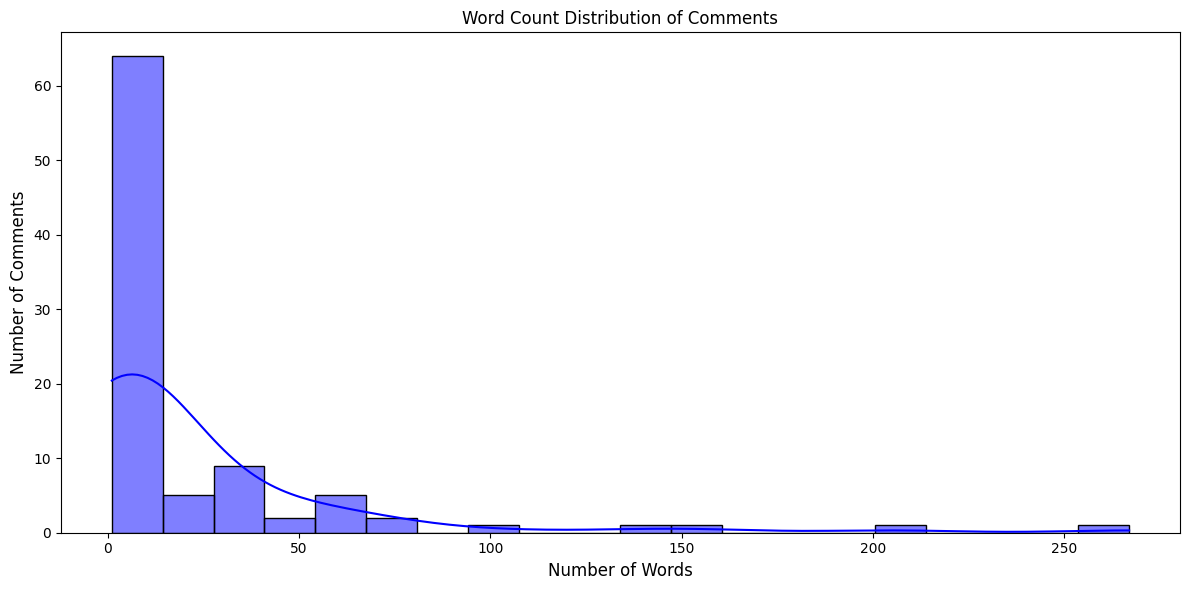

In [2]:
from utils.plot_words_distribution import plot_distribution_of_words

text_col = 'content'

# take the topic No2:  Presentation on the component design
df_sum_3 = df_comments[0:92]
df_sum_3 = df_sum_3.reset_index(drop=True)
print(df_sum_3)

# plot the distribution of words
plot_distribution_of_words(df_sum_3, text_col)

In [3]:
from utils.load_prompts import load_chosen_prompt
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments
from utils.load_pretrained_spacy_model import load_pretrained_model
from sklearn.model_selection import train_test_split

# load the final dataset and the language
df_sum_3, _ = load_pretrained_model(df=df_sum_3, text_col=text_col)

# load the prompt template
prompt_template = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The language of the dataset is: en
The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


### 1ST SUMMARIZATION TECHNIQUE: SEPARATE COMMENTS RANDOMLY INTO GROUPS

We are going to implement a simple technique by grouping the comments/reviews into groups randomly, create a summary for each group of comments and finally a final summarization based on the summaries of group of comments

In [4]:
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments

language = 'English'
topic = df_topics.iloc[0].topic

# divide the comments into groups
groups_1 = divide_comments_by_time(df_sum_3, text_column='content')

#create the summaries
summaries_1 = create_summary_for_groups_of_comments(groups=groups_1, prompt=prompt_template, gpt_model='gpt-4o', language=language, topic=topic)

Comments do not contain timestamp. Continue the group by shuffle them.


  7%|█████████████▌                                                                                                                                                                                             | 1/15 [00:01<00:26,  1.91s/it]

The comments highlight several key points regarding the presentation on market trends. There is an emphasis on innovative features that differentiate a product in the market, such as lighting up when interacted with, which suggests a focus on unique, engaging design elements. Additionally, one comment discusses a comprehensive strategy for dealing with collected market research: summarizing data, identifying relevant trends in line with the project plan, and initiating discussions to refine design options. This structured approach aims to cohesively integrate market insights into the project development process.


 13%|███████████████████████████                                                                                                                                                                                | 2/15 [00:03<00:21,  1.64s/it]

The comments reflect discussions on the importance of aligning product designs with broader contexts, particularly integrating market trends with home decor elements while avoiding overly niche designs. There is concern about the practicality and reception of unique designs such as a remote control in the shape of an apple, emphasizing a balance between innovation and usability. Additionally, market research indicates that consumers prioritize a fancy look and feel for television remote controls over functionality, highlighting aesthetic preferences in product design.


 20%|████████████████████████████████████████▌                                                                                                                                                                  | 3/15 [00:05<00:21,  1.82s/it]

The comments highlight the significance of integrating both innovative and practical design features into products, particularly in relation to market trends. One insightful suggestion is to draw inspiration from familiar and successful designs, such as the Mac iPod, but adapt them to be more comfortable and vibrant. There is also an emphasis on unifying product themes, materials, and shapes, creating a coherent marketing identity that resonates with consumers. Colors and textures are identified as key elements in this approach, with ideas like using green hues to establish a friendly and thematic consistency. The discussion underscores the importance of aligning design features with consumer expectations and market trends for overall product success.


 27%|██████████████████████████████████████████████████████▏                                                                                                                                                    | 4/15 [00:06<00:17,  1.58s/it]

The comments suggest incorporating features like lighting elements in product designs to add a touch of innovation, akin to how phone buttons light up when pressed. There is also a brief mention of market research focusing on fashion styles, highlighting an emerging trend around themes of fruit and vegetables in European fashion trends. Discussions indicate a transition towards action and design in later stages of meetings, moving away from background talk, which aligns with previous insights on structured and coherent design integration.


 33%|███████████████████████████████████████████████████████████████████▋                                                                                                                                       | 5/15 [00:08<00:15,  1.52s/it]

The comments suggest enhancing product designs by incorporating customizable lighting elements, allowing for different colors or covers to appeal to consumers' preferences. There is also a recommendation to consolidate discussions after presentations to streamline the review process. Additionally, the product design will use non-rechargeable batteries and integrate audio-visual functions while excluding teletext, focusing solely on TV features. Moreover, incorporating corporate colors and slogans is emphasized to maintain brand consistency.


 40%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                                                         | 6/15 [00:09<00:12,  1.36s/it]

The comments suggest a general agreement and approval of the current state or progress, without providing specific insights or detailed feedback. This indicates that the group is satisfied with the way things are progressing or the solutions presented, but no additional actionable points or new topics were introduced.


 47%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                            | 7/15 [00:09<00:09,  1.18s/it]

The comments convey a general consensus on advancing high-tech features, particularly focusing on substantial storage capacity like ten gigabytes, and innovative designs that lack traditional buttons. There is an emphasis on proceeding to make decisions following these initial considerations.


 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                              | 8/15 [00:10<00:07,  1.14s/it]

The comments primarily revolve around debating whether to engage with or diverge from observed market trends in industries such as clothing and furniture. The discussion reflects a contemplative approach regarding how to integrate or react to these trends, rather than presenting new ideas or detailed actionable points. Additionally, some comments indicate readiness for proceeding with the presentation or discussion process.


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 9/15 [00:11<00:06,  1.06s/it]

The comments reflect unanimous agreement and positivity towards the current discussion, with affirmations but no additional insights or new actionable points introduced. This indicates satisfaction with the presentation and consensus on the topic, similar to previous patterns of general approval without specific feedback.


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 10/15 [00:12<00:05,  1.05s/it]

The comments highlight the goal of reaching a decision on product concepts by the end of the meeting. There are no additional insights or detailed feedback provided, with participants agreeing to the proposed structure of starting discussions with Andrew, followed by Craig, and then David. This reflects a procedural consensus without new actionable points.


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 11/15 [00:13<00:03,  1.02it/s]

The comments reflect general observations and mild engagement with the presentation, mentioning discontent and difficulties with accessing or understanding materials. There are no significant insights or actionable points introduced, with some ambiguous vocal sounds and brief remarks indicating a lack of detailed feedback or specific suggestions.


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 12/15 [00:15<00:03,  1.10s/it]

The comments reflect a lack of detailed feedback or new insights, with participants making brief or non-specific remarks such as affirmations or vocal sounds. This indicates minimal engagement and absence of actionable points regarding the presentation on market trends.


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 13/15 [00:15<00:02,  1.06s/it]

The comments reflect minimal engagement and lack of detailed feedback on the presentation on market trends, primarily consisting of brief affirmations and acknowledgments. There are no new insights or actionable points introduced, similar to previous patterns of general engagement without specific feedback.


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 14/15 [00:17<00:01,  1.20s/it]

The comments reveal a detailed discussion on key market trends with a focus on innovative design and ease of use. There is a consensus on the importance of having background information to ensure success, alongside the need to capitalize on market shifts towards ergonomic and friendly materials. The discussion suggests that competition is likely adhering to last year's trends, providing an opportunity for differentiation. Emphasis is placed on innovative and user-friendly designs with vibrant natural colors, ensuring any innovation contributes to the product's aesthetic rather than just functionality. Insights reflect the need for creativity in design while maintaining practicality.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:19<00:00,  1.30s/it]

The comments reflect a lack of detailed feedback and mostly consist of brief affirmations and general observations. The participants briefly discuss potential themes such as "lemon" and identify their target group as being between fifteen to thirty-five years old. There is a general emphasis on the importance of ease of use and the need to innovate in a way that enhances usability. However, the comments primarily reflect minimal engagement and do not introduce new actionable points or specific suggestions for improving the presentation on market trends. The discussion also involves revisiting previous ideas with an expectation to recap decision points from prior meetings.


In [5]:
# load the prompt template
prompt_template_final_1 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 2
The required arguments are: ['topic', 'summaries']


#### FINAL SUMMARY BASED ON SUMMARIES OF COMMENTS

In [6]:
from summarization_methods.divide_comments_and_summarize import final_summary_of_divided_comments
topic = df_topics.iloc[0].topic

#create the summaries
final_summary_1 = final_summary_of_divided_comments(prompt=prompt_template_final_1, gpt_model='gpt-4o', topic=topic, summaries=summaries_1)

The final summary of the discussion on market trends highlights several key points and addresses problems, agreements, and challenges identified in the comments. 

Firstly, there is a strong emphasis on integrating innovative features into product designs that align with market trends and consumer preferences, such as customizable lighting elements and unique shapes. The importance of balancing innovation with practicality and usability is underscored, reflecting a concern about overly niche designs and emphasizing the need for a coherent marketing identity through unified themes, colors, and materials.

Additionally, there is a focus on a structured approach to market research, including summarizing data and identifying relevant trends to inform the design process. Participants stress the need for creativity in product design, ensuring innovations enhance aesthetic appeal while maintaining functionality.

Discussions also reveal a preference for incorporating familiar and successful d

### 2ND SUMMARIZATION TECHNIQUE: CLASSIFY COMMENTS BASED ON LABELS AND SUMMARY THE LABELS

We are going to implement more complicated technique, in which we are going to classify comments based on some labels that we are going to define. For each label for are going to create summaries and finally a final summary based on these summaries

In [7]:
from summarization_methods.classification_of_comments_and_summarization import classify_comments

df_sum_3 = classify_comments(df=df_sum_3, text_col='content', prompt_name='prompt_for_classification_QMSUM', gpt_model='gpt-4o')

  1%|██▏                                                                                                                                                                                                        | 1/92 [00:00<00:45,  1.98it/s]

'1'
Chosen label from GPT model is: 1


  2%|████▍                                                                                                                                                                                                      | 2/92 [00:01<00:46,  1.95it/s]

'1'
Chosen label from GPT model is: 1


  3%|██████▌                                                                                                                                                                                                    | 3/92 [00:01<00:45,  1.96it/s]

'1'
Chosen label from GPT model is: 1


  4%|████████▊                                                                                                                                                                                                  | 4/92 [00:02<00:45,  1.95it/s]

'1'
Chosen label from GPT model is: 1


  5%|███████████                                                                                                                                                                                                | 5/92 [00:02<00:43,  2.01it/s]

1
Chosen label from GPT model is: 1


  7%|█████████████▏                                                                                                                                                                                             | 6/92 [00:03<00:43,  2.00it/s]

'1'
Chosen label from GPT model is: 1


  8%|███████████████▍                                                                                                                                                                                           | 7/92 [00:03<00:43,  1.97it/s]

'1'
Chosen label from GPT model is: 1


  9%|█████████████████▋                                                                                                                                                                                         | 8/92 [00:04<00:42,  1.96it/s]

'1'
Chosen label from GPT model is: 1


 10%|███████████████████▊                                                                                                                                                                                       | 9/92 [00:04<00:42,  1.97it/s]

'1'
Chosen label from GPT model is: 1


 11%|█████████████████████▉                                                                                                                                                                                    | 10/92 [00:05<00:41,  1.95it/s]

'1'
Chosen label from GPT model is: 1


 12%|████████████████████████▏                                                                                                                                                                                 | 11/92 [00:05<00:42,  1.93it/s]

'1'
Chosen label from GPT model is: 1


 13%|██████████████████████████▎                                                                                                                                                                               | 12/92 [00:06<00:41,  1.93it/s]

'1'
Chosen label from GPT model is: 1


 14%|████████████████████████████▌                                                                                                                                                                             | 13/92 [00:06<00:40,  1.96it/s]

'1'
Chosen label from GPT model is: 1


 15%|██████████████████████████████▋                                                                                                                                                                           | 14/92 [00:07<00:40,  1.95it/s]

'1'
Chosen label from GPT model is: 1


 16%|████████████████████████████████▉                                                                                                                                                                         | 15/92 [00:07<00:38,  1.98it/s]

1
Chosen label from GPT model is: 1


 17%|███████████████████████████████████▏                                                                                                                                                                      | 16/92 [00:08<00:38,  1.96it/s]

'1'
Chosen label from GPT model is: 1


 18%|█████████████████████████████████████▎                                                                                                                                                                    | 17/92 [00:08<00:37,  1.99it/s]

'1'
Chosen label from GPT model is: 1


 20%|███████████████████████████████████████▌                                                                                                                                                                  | 18/92 [00:09<00:37,  1.95it/s]

'1'
Chosen label from GPT model is: 1


 21%|█████████████████████████████████████████▋                                                                                                                                                                | 19/92 [00:09<00:37,  1.92it/s]

'1'
Chosen label from GPT model is: 1


 22%|███████████████████████████████████████████▉                                                                                                                                                              | 20/92 [00:10<00:37,  1.91it/s]

'1'
Chosen label from GPT model is: 1


 23%|██████████████████████████████████████████████                                                                                                                                                            | 21/92 [00:10<00:37,  1.90it/s]

'2'
Chosen label from GPT model is: 2


 24%|████████████████████████████████████████████████▎                                                                                                                                                         | 22/92 [00:11<00:36,  1.92it/s]

'1'
Chosen label from GPT model is: 1


 25%|██████████████████████████████████████████████████▌                                                                                                                                                       | 23/92 [00:11<00:37,  1.82it/s]

'1'
Chosen label from GPT model is: 1


 26%|████████████████████████████████████████████████████▋                                                                                                                                                     | 24/92 [00:12<00:38,  1.78it/s]

1
Chosen label from GPT model is: 1


 27%|██████████████████████████████████████████████████████▉                                                                                                                                                   | 25/92 [00:13<00:38,  1.73it/s]

'1'
Chosen label from GPT model is: 1


 28%|█████████████████████████████████████████████████████████                                                                                                                                                 | 26/92 [00:13<00:38,  1.70it/s]

'1'
Chosen label from GPT model is: 1


 29%|███████████████████████████████████████████████████████████▎                                                                                                                                              | 27/92 [00:14<00:39,  1.65it/s]

'1'
Chosen label from GPT model is: 1


 30%|█████████████████████████████████████████████████████████████▍                                                                                                                                            | 28/92 [00:14<00:38,  1.67it/s]

'1'
Chosen label from GPT model is: 1


 32%|███████████████████████████████████████████████████████████████▋                                                                                                                                          | 29/92 [00:15<00:38,  1.65it/s]

'1'
Chosen label from GPT model is: 1


 33%|█████████████████████████████████████████████████████████████████▊                                                                                                                                        | 30/92 [00:16<00:37,  1.65it/s]

'1'
Chosen label from GPT model is: 1


 34%|████████████████████████████████████████████████████████████████████                                                                                                                                      | 31/92 [00:16<00:37,  1.65it/s]

'1'
Chosen label from GPT model is: 1


 35%|██████████████████████████████████████████████████████████████████████▎                                                                                                                                   | 32/92 [00:17<00:36,  1.64it/s]

0
Chosen label from GPT model is: 0


 36%|████████████████████████████████████████████████████████████████████████▍                                                                                                                                 | 33/92 [00:18<00:36,  1.64it/s]

'0'
Chosen label from GPT model is: 0


 37%|██████████████████████████████████████████████████████████████████████████▋                                                                                                                               | 34/92 [00:18<00:36,  1.61it/s]

'2'
Chosen label from GPT model is: 2


 38%|████████████████████████████████████████████████████████████████████████████▊                                                                                                                             | 35/92 [00:19<00:35,  1.60it/s]

1
Chosen label from GPT model is: 1


 39%|███████████████████████████████████████████████████████████████████████████████                                                                                                                           | 36/92 [00:21<01:08,  1.23s/it]

'1'
Chosen label from GPT model is: 1


 40%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                                                        | 37/92 [00:22<00:55,  1.01s/it]

'1'
Chosen label from GPT model is: 1


 41%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                                                      | 38/92 [00:22<00:46,  1.16it/s]

'1'
Chosen label from GPT model is: 1


 42%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                    | 39/92 [00:23<00:41,  1.27it/s]

'1'
Chosen label from GPT model is: 1


 43%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                  | 40/92 [00:24<00:36,  1.42it/s]

'1'
Chosen label from GPT model is: 1


 45%|██████████████████████████████████████████████████████████████████████████████████████████                                                                                                                | 41/92 [00:24<00:33,  1.54it/s]

'1'
Chosen label from GPT model is: 1


 46%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                             | 42/92 [00:25<00:30,  1.65it/s]

'0'
Chosen label from GPT model is: 0


 47%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                           | 43/92 [00:25<00:28,  1.74it/s]

1
Chosen label from GPT model is: 1


 48%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                         | 44/92 [00:26<00:27,  1.76it/s]

'1'
Chosen label from GPT model is: 1


 49%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                       | 45/92 [00:26<00:26,  1.79it/s]

'2'
Chosen label from GPT model is: 2


 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                     | 46/92 [00:27<00:24,  1.86it/s]

2
Chosen label from GPT model is: 2


 51%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                  | 47/92 [00:27<00:24,  1.85it/s]

'1'
Chosen label from GPT model is: 1


 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 48/92 [00:28<00:23,  1.91it/s]

1
Chosen label from GPT model is: 1


 53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 49/92 [00:28<00:22,  1.95it/s]

1
Chosen label from GPT model is: 1


 54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 50/92 [00:29<00:21,  1.94it/s]

1
Chosen label from GPT model is: 1


 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                          | 51/92 [00:29<00:21,  1.87it/s]

1
Chosen label from GPT model is: 1


 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                       | 52/92 [00:30<00:20,  1.91it/s]

1
Chosen label from GPT model is: 1


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 53/92 [00:30<00:20,  1.92it/s]

'1'
Chosen label from GPT model is: 1


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 54/92 [00:31<00:19,  1.92it/s]

'1'
Chosen label from GPT model is: 1


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 55/92 [00:31<00:19,  1.92it/s]

'0'
Chosen label from GPT model is: 0


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 56/92 [00:32<00:18,  1.96it/s]

0
Chosen label from GPT model is: 0


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 57/92 [00:32<00:17,  1.95it/s]

'1'
Chosen label from GPT model is: 1


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 58/92 [00:33<00:17,  1.91it/s]

'1'
Chosen label from GPT model is: 1


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 59/92 [00:33<00:17,  1.87it/s]

'1'
Chosen label from GPT model is: 1


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 60/92 [00:34<00:16,  1.90it/s]

'2'
Chosen label from GPT model is: 2


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 61/92 [00:34<00:15,  1.95it/s]

0
Chosen label from GPT model is: 0


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 62/92 [00:35<00:15,  1.96it/s]

'1'
Chosen label from GPT model is: 1


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 63/92 [00:36<00:15,  1.93it/s]

1
Chosen label from GPT model is: 1


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 64/92 [00:36<00:14,  1.93it/s]

'1'
Chosen label from GPT model is: 1


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 65/92 [00:37<00:13,  1.96it/s]

'1'
Chosen label from GPT model is: 1


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 66/92 [00:37<00:13,  1.94it/s]

'1'
Chosen label from GPT model is: 1


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 67/92 [00:38<00:12,  1.94it/s]

'1'
Chosen label from GPT model is: 1


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 68/92 [00:38<00:12,  1.92it/s]

'1'
Chosen label from GPT model is: 1


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 69/92 [00:39<00:12,  1.90it/s]

'1'
Chosen label from GPT model is: 1


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 70/92 [00:39<00:11,  1.93it/s]

'1'
Chosen label from GPT model is: 1


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 71/92 [00:40<00:10,  1.95it/s]

'1'
Chosen label from GPT model is: 1


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 72/92 [00:40<00:10,  1.94it/s]

'2'
Chosen label from GPT model is: 2


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 73/92 [00:41<00:09,  1.96it/s]

'1'
Chosen label from GPT model is: 1


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 74/92 [00:41<00:09,  1.93it/s]

'0'
Chosen label from GPT model is: 0


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 75/92 [00:42<00:08,  1.94it/s]

'1'
Chosen label from GPT model is: 1


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 76/92 [00:42<00:08,  1.85it/s]

'1'
Chosen label from GPT model is: 1


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 77/92 [00:43<00:07,  1.89it/s]

'0'
Chosen label from GPT model is: 0


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 78/92 [00:43<00:07,  1.92it/s]

'1'
Chosen label from GPT model is: 1


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 79/92 [00:44<00:06,  1.94it/s]

'0'
Chosen label from GPT model is: 0


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 80/92 [00:44<00:06,  1.96it/s]

'1'
Chosen label from GPT model is: 1


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 81/92 [00:45<00:05,  1.97it/s]

'1'
Chosen label from GPT model is: 1


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 82/92 [00:45<00:05,  1.91it/s]

'1'
Chosen label from GPT model is: 1


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 83/92 [00:46<00:04,  1.93it/s]

1
Chosen label from GPT model is: 1


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 84/92 [00:46<00:04,  1.93it/s]

'1'
Chosen label from GPT model is: 1


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 85/92 [00:47<00:03,  1.97it/s]

'1'
Chosen label from GPT model is: 1


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 86/92 [00:47<00:03,  1.94it/s]

'1'
Chosen label from GPT model is: 1


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 87/92 [00:48<00:02,  1.98it/s]

'1'
Chosen label from GPT model is: 1


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 88/92 [00:48<00:02,  1.97it/s]

'1'
Chosen label from GPT model is: 1


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 89/92 [00:49<00:01,  1.93it/s]

'0'
Chosen label from GPT model is: 0


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/92 [00:49<00:01,  1.92it/s]

'1'
Chosen label from GPT model is: 1


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 91/92 [00:50<00:00,  1.83it/s]

0
Chosen label from GPT model is: 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:51<00:00,  1.80it/s]

1
Chosen label from GPT model is: 1


In [8]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_2 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [9]:
from summarization_methods.classification_of_comments_and_summarization import summarize_comments_by_label

text_col = 'content'
language = 'English'
topic = df_topics.iloc[0].topic

# produce the summaries for grouped comments by label
summaries_2 = summarize_comments_by_label(df=df_sum_3, text_col=text_col, prompt_name=prompt_template_2, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_2 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_comments')

The comments reflect a variety of brief, reactive statements predominantly characterized by affirmations ("Yeah", "Okay", "Sure") and some suggestions for future actions and reflections on the presentations. There is a recurring interest in how to build on the current market trends, potentially through revisits and further discussions. Overall, the comments primarily consist of short acknowledgments coupled with a few proposals for continued analysis and engagement.
The comments consist of brief and reactive statements, including expressions of confusion or difficulty ("Why don't I get that?", "Oh no", "It's not good"), interspersed with vocal sounds representing reactions. Additionally, there are remarks suggesting skepticism about certain approaches ("I think that would be pushing it"). Overall, the comments capture a mix of uncertainty and cautious responses to the presented market trends.
The comments predominantly consist of brief affirmations ("Yeah, cool", "Uh-huh, okay great"),

In [10]:
from summarization_methods.classification_of_comments_and_summarization import final_summary_of_labeled_comments

# produce the final summary for the 2nd technique
final_summary_2 = final_summary_of_labeled_comments(prompt=prompt_template_final_2, gpt_model='gpt-4o', topic=topic, summaries=summaries_2)

The comments on the market trends presentation predominantly consist of brief, reactive statements, ranging from affirmations and acknowledgments to expressions of confusion and skepticism. There is a recurring interest in further exploring and building on current market trends, with suggestions for revisits and continued discussions. Despite some confusion and cautious responses, the comments generally show engagement and a mix of positive reactions to the presented material.


### 3RD SUMMARIZATION TECHNIQUE: CLUSTER COMMENTS AND SUMMARY THE CLUSTERS

We are going to implement our 3rd technique. Initially, we are going to cluster the comments with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:28<00:00,  3.20it/s]


Using PCA to transformed embeddings


 35%|██████████████████████████████████████████████████████████████████████                                                                                                                                    | 17/49 [00:01<00:02, 14.51it/s]


The product of size_min and n_clusters cannot exceed the number of samples.
Terminating the calculation...
The optimum kappa based on Penalized Silhouette score is: 12


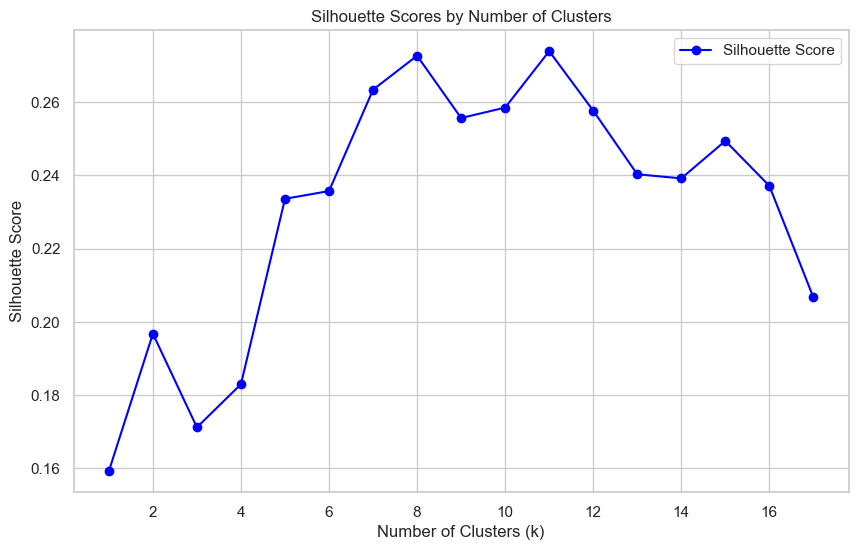

Silhouette score for best kappa: 0.326


In [11]:
from summarization_methods.topic_extraction_clustering_and_summarization import calc_clusters_with_kmeans

text_col='content'

# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
df_sum_3, kmeans_results = calc_clusters_with_kmeans(df=df_sum_3, text_col=text_col, max_token_length=1000, is_pca=(True, 16))

In [12]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_3 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [13]:
from summarization_methods.topic_extraction_clustering_and_summarization import summarize_comments_by_cluster

text_col = 'content'
language = 'English'
topic = df_topics.iloc[0].topic

# produce the summaries for grouped comments by label
summaries_3 =summarize_comments_by_cluster(df=df_sum_3, text_col=text_col, prompt_name=prompt_template_3, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_3 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_comments')

The comments reveal a focus on next steps and decisions. Key insights include determining how to fulfill set objectives, agreeing on a target group of fifteen-year-olds, and selecting non-rechargeable products. Practical steps include planning three presentations, followed by additional preparations and selecting appropriate backgrounds for each theme. The presentation content should address impacts on other areas, especially in clothing and furniture sectors. Attention is also given to evaluation and refinement after the presentation roll-out.
The comments unanimously express agreement and affirmation, indicating no further insights or detailed discussion.
The comments are largely composed of filler words and vocal sounds, but some useful aspects can be extracted. Key insights include the necessity for revisiting previously discussed topics and verifying that no critical points have been overlooked. The focus appears to be on ensuring that all relevant aspects have been covered and pr

In [14]:
from summarization_methods.topic_extraction_clustering_and_summarization import final_summary_of_clustered_comments

# produce the final summary for the 3rd technique
final_summary_3 = final_summary_of_clustered_comments(prompt=prompt_template_final_3, gpt_model='gpt-4o', topic=topic, summaries=summaries_3)

The discussion on market trends is characterized by a well-defined focus on next steps and practical details, such as targeting fifteen-year-olds and selecting non-rechargeable products. The planning involves preparing three presentations with appropriate backgrounds, specifically addressing impacts on clothing and furniture sectors. There is significant agreement among participants with minimal divergence in opinions, although some discussions reflect a mix of agreement, disagreement, and tentative ideas. A revisiting of topics and ensuring all relevant aspects are covered are also emphasized. Background information and methodologies are shared, and there are efforts to improve the presentation. Despite occasional dissatisfaction and logistical confirmations, the discussion is generally aligned with the goal of effectively presenting market trends, highlighting practical applications and necessary adjustments. Overall, the comments reflect a convergence on the planned steps, with an e

### 4TH SUMMARIZATION TECHNIQUE: TOPICS EXTRACTION OF COMMENTS, CLUSTER TOPICS AND SUMMARY THE CLUSTERS

We are going to implement our final technique in which we hope to be the best. Initially, we are going to extract topics for each comment/review. Moreover, we are going to cluster them with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

In [15]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_topics = load_chosen_prompt(prompt_name='prompt_for_topic_extraction')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['topic', 'language', 'topics', 'comment']


In [16]:
from summarization_methods.topic_extraction_clustering_and_summarization import topic_extraction

topic = df_topics.iloc[0].topic
language = 'English'

# extract topics using llm's (openai gpt-4o)
df_sum_3, df_topics_3 = topic_extraction(df=df_sum_3, text_col='content', prompt_template=prompt_template_topics, gpt_model='gpt-4o', topic=topic, language=language)

print('--------------------------------------------------------------------------------------------------------------------------------')
print(f'The length of the topics that produced are: {len(df_topics_3)}')
print(f'The columns of the new dataframe are: {df_topics_3.columns}')

  1%|██▏                                                                                                                                                                                                        | 1/92 [00:00<00:52,  1.74it/s]

extracted topics: ['decision-making', 'fulfillment', 'market trends']


  2%|████▍                                                                                                                                                                                                      | 2/92 [00:00<00:43,  2.07it/s]

extracted topics: []


  3%|██████▌                                                                                                                                                                                                    | 3/92 [00:01<00:43,  2.07it/s]

extracted topics: ['market trends', 'decision-making', 'fulfillment']


  4%|████████▊                                                                                                                                                                                                  | 4/92 [00:01<00:40,  2.19it/s]

extracted topics: []


  5%|███████████                                                                                                                                                                                                | 5/92 [00:02<00:38,  2.26it/s]

extracted topics: ['market trends']


  7%|█████████████▏                                                                                                                                                                                             | 6/92 [00:02<00:38,  2.21it/s]

extracted topics: ['market trends']


  8%|███████████████▍                                                                                                                                                                                           | 7/92 [00:03<00:42,  2.01it/s]

extracted topics: ['market trends', 'decision-making', 'fulfillment']


  9%|█████████████████▋                                                                                                                                                                                         | 8/92 [00:03<00:41,  2.04it/s]

extracted topics: ['action', 'design', 'meeting conclusion']


 10%|███████████████████▊                                                                                                                                                                                       | 9/92 [00:04<00:40,  2.05it/s]

extracted topics: []


 11%|█████████████████████▉                                                                                                                                                                                    | 10/92 [00:04<00:38,  2.15it/s]

extracted topics: []


 12%|████████████████████████▏                                                                                                                                                                                 | 11/92 [00:05<00:37,  2.18it/s]

extracted topics: ['background']


 13%|██████████████████████████▎                                                                                                                                                                               | 12/92 [00:06<00:46,  1.72it/s]

extracted topics: ['readiness', 'preparation']


 14%|████████████████████████████▌                                                                                                                                                                             | 13/92 [00:06<00:42,  1.85it/s]

extracted topics: []


 15%|██████████████████████████████▋                                                                                                                                                                           | 14/92 [00:06<00:41,  1.89it/s]

extracted topics: ['recap', 'previous meeting', 'decision-making']


 16%|████████████████████████████████▉                                                                                                                                                                         | 15/92 [00:07<00:38,  1.98it/s]

extracted topics: ['acknowledgment']


 17%|███████████████████████████████████▏                                                                                                                                                                      | 16/92 [00:07<00:37,  2.05it/s]

extracted topics: ['target group', 'age range']


 18%|█████████████████████████████████████▎                                                                                                                                                                    | 17/92 [00:08<00:35,  2.12it/s]

extracted topics: []


 20%|███████████████████████████████████████▌                                                                                                                                                                  | 18/92 [00:09<00:40,  1.82it/s]

extracted topics: ['non-rechargeable battery', 'audio-visual grouping', 'function categorization', 'teletext exclusion', 'corporate color', 'corporate slogan', 'previous meeting recap']


 21%|█████████████████████████████████████████▋                                                                                                                                                                | 19/92 [00:09<00:37,  1.96it/s]

extracted topics: ['acknowledgment']


 22%|███████████████████████████████████████████▉                                                                                                                                                              | 20/92 [00:09<00:36,  1.95it/s]

extracted topics: ['readiness', 'recap', 'acknowledgment']


 23%|██████████████████████████████████████████████                                                                                                                                                            | 21/92 [00:10<00:34,  2.08it/s]

extracted topics: []


 24%|████████████████████████████████████████████████▎                                                                                                                                                         | 22/92 [00:10<00:33,  2.09it/s]

extracted topics: []


 25%|██████████████████████████████████████████████████▌                                                                                                                                                       | 23/92 [00:11<00:35,  1.96it/s]

extracted topics: ['market trends', 'presentation', 'readiness']


 26%|████████████████████████████████████████████████████▋                                                                                                                                                     | 24/92 [00:12<00:37,  1.81it/s]

extracted topics: ['presentation', 'discussion format', 'meeting structure']


 27%|██████████████████████████████████████████████████████▉                                                                                                                                                   | 25/92 [00:12<00:34,  1.93it/s]

extracted topics: []


 28%|█████████████████████████████████████████████████████████                                                                                                                                                 | 26/92 [00:12<00:32,  2.01it/s]

extracted topics: ['presentation structure', 'speaker order']


 29%|███████████████████████████████████████████████████████████▎                                                                                                                                              | 27/92 [00:13<00:32,  1.97it/s]

extracted topics: ['market trends', 'presentation']


 30%|█████████████████████████████████████████████████████████████▍                                                                                                                                            | 28/92 [00:13<00:31,  2.04it/s]

extracted topics: []


 32%|███████████████████████████████████████████████████████████████▋                                                                                                                                          | 29/92 [00:14<00:30,  2.09it/s]

extracted topics: ['agreement']


 33%|█████████████████████████████████████████████████████████████████▊                                                                                                                                        | 30/92 [00:14<00:28,  2.18it/s]

extracted topics: ['acknowledgment']


 34%|████████████████████████████████████████████████████████████████████                                                                                                                                      | 31/92 [00:15<00:28,  2.14it/s]

extracted topics: ['decision-making']


 35%|██████████████████████████████████████████████████████████████████████▎                                                                                                                                   | 32/92 [00:15<00:27,  2.19it/s]

extracted topics: ['acknowledgment']


 36%|████████████████████████████████████████████████████████████████████████▍                                                                                                                                 | 33/92 [00:16<00:25,  2.28it/s]

extracted topics: []


 37%|██████████████████████████████████████████████████████████████████████████▋                                                                                                                               | 34/92 [00:16<00:25,  2.32it/s]

extracted topics: ['acknowledgment']


 38%|████████████████████████████████████████████████████████████████████████████▊                                                                                                                             | 35/92 [00:17<00:27,  2.09it/s]

extracted topics: ['speech recognition', 'decision-making', 'incorporation', 'definite decision']


 39%|███████████████████████████████████████████████████████████████████████████████                                                                                                                           | 36/92 [00:17<00:27,  2.02it/s]

extracted topics: ['acknowledgment']


 40%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                                                        | 37/92 [00:18<00:27,  2.01it/s]

extracted topics: ['final objective', 'decision-making', 'product concepts', 'meeting goals']


 41%|███████████████████████████████████████████████████████████████████████████████████▍                                                                                                                      | 38/92 [00:18<00:26,  2.06it/s]

extracted topics: ['acknowledgment']


 42%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                    | 39/92 [00:19<00:25,  2.12it/s]

extracted topics: ['final objective', 'presentation conclusion']


 43%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                  | 40/92 [00:19<00:24,  2.13it/s]

extracted topics: ['acknowledgment', 'question']


 45%|██████████████████████████████████████████████████████████████████████████████████████████                                                                                                                | 41/92 [00:20<00:24,  2.11it/s]

extracted topics: ['acknowledgment', 'waiting']


 46%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                             | 42/92 [00:20<00:23,  2.16it/s]

extracted topics: ['acknowledgment']


 47%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                           | 43/92 [00:21<00:23,  2.07it/s]

extracted topics: ['acknowledgment']


 48%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                         | 44/92 [00:21<00:24,  1.97it/s]

extracted topics: ['presentation start', 'vocal sounds', 'disfluency markers', 'proceeding with presentation']


 49%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                       | 45/92 [00:22<00:23,  2.01it/s]

extracted topics: ['acknowledgment', 'vocal sounds']


 50%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                     | 46/92 [00:22<00:23,  1.93it/s]

extracted topics: ['acknowledgment', 'searching', 'template']


 51%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                  | 47/92 [00:23<00:22,  2.00it/s]

extracted topics: ['acknowledgment']


 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 48/92 [00:23<00:22,  2.00it/s]

extracted topics: ['acknowledgment', 'proceeding with presentation']


 53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                              | 49/92 [00:24<00:25,  1.66it/s]

extracted topics: ['presentation start', 'proceeding with presentation']


 54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                            | 50/92 [00:24<00:24,  1.72it/s]

extracted topics: ['method explanation', 'background information', 'success acknowledgment', 'initial steps']


 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                          | 51/92 [00:25<00:23,  1.75it/s]

extracted topics: ['acknowledgment']


 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                       | 52/92 [00:26<00:25,  1.57it/s]

extracted topics: ['information summarization', 'market research', 'trend identification', 'discussion initiation', 'design options', 'project planning', 'strategy explanation']


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                     | 53/92 [00:26<00:22,  1.73it/s]

extracted topics: ['acknowledgment']


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 54/92 [00:27<00:20,  1.85it/s]

extracted topics: ['vocal sounds']


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 55/92 [00:27<00:19,  1.89it/s]

extracted topics: ['impact assessment', 'suggestions', 'strategic decisions']


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                               | 56/92 [00:28<00:18,  1.96it/s]

extracted topics: ['acknowledgment']


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 57/92 [00:28<00:18,  1.92it/s]

extracted topics: ['disfluency markers', 'consumer preferences', 'product design', 'market research', 'presentation detail']


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 58/92 [00:29<00:17,  1.96it/s]

extracted topics: ['acknowledgment']


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 59/92 [00:29<00:18,  1.80it/s]

extracted topics: ['acknowledgment', 'innovation discussion', 'design considerations', 'usability', 'foreshadowing', 'marketing strategy', 'technology integration']


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 60/92 [00:30<00:18,  1.78it/s]

extracted topics: ['vocal sounds', 'acknowledgment']


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 61/92 [00:30<00:16,  1.88it/s]

extracted topics: ['product innovation', 'usability', 'technology integration']


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 62/92 [00:31<00:15,  1.95it/s]

extracted topics: ['vocal sounds']


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 63/92 [00:31<00:15,  1.93it/s]

extracted topics: ['disfluency markers', 'ease of use', 'innovation', 'usability']


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 64/92 [00:32<00:13,  2.01it/s]

extracted topics: ['acknowledgment']


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 65/92 [00:32<00:14,  1.86it/s]

extracted topics: ['market research', 'fashion style', 'priority', 'European fashion trend', 'emerging theme', 'fruit and vegetables', 'vocal sounds']


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 66/92 [00:33<00:13,  1.97it/s]

extracted topics: ['vocal sounds']


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 67/92 [00:33<00:12,  2.08it/s]

extracted topics: ['vocal sounds']


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 68/92 [00:34<00:12,  1.99it/s]

extracted topics: ['fashion considerations', 'furniture trends', 'strategic decision making', 'trend analysis', 'market adoption']


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 69/92 [00:34<00:11,  2.09it/s]

extracted topics: []


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 70/92 [00:35<00:11,  1.91it/s]

extracted topics: ['observing trends', 'product fit', 'home decor', 'electronics', 'design considerations', 'product creation', 'vocal sounds']


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 71/92 [00:35<00:10,  2.04it/s]

extracted topics: ['vocal sounds']


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 72/92 [00:36<00:09,  2.13it/s]

extracted topics: ['vocal sounds']


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 73/92 [00:36<00:09,  1.97it/s]

extracted topics: ['vocal sounds']


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 74/92 [00:37<00:10,  1.65it/s]

extracted topics: ['material trends', 'ergonomics', 'market competition', 'market strategy', 'style importance', 'innovative design', 'cutting edge technology', 'ease of use', 'vibrant colors', 'soft materials', 'shape and function', 'Mac iPods']


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 75/92 [00:38<00:09,  1.78it/s]

extracted topics: ['vocal sounds']


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 76/92 [00:38<00:09,  1.75it/s]

extracted topics: ['high-tech devices', 'user interface', 'technology features', 'ergonomics']


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 77/92 [00:39<00:08,  1.78it/s]

extracted topics: []


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 78/92 [00:39<00:08,  1.70it/s]

extracted topics: ['product customization', 'vibrant colors', 'marketing identity', 'technological adaptation', 'shape and materials']


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 79/92 [00:40<00:07,  1.69it/s]

extracted topics: ['positive feedback']


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 80/92 [00:41<00:07,  1.70it/s]

extracted topics: ['theme selection', 'product naming', 'flavor associations', 'branding strategies', 'web design trends']


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 81/92 [00:41<00:05,  1.85it/s]

extracted topics: ['general response']


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 82/92 [00:42<00:06,  1.62it/s]

extracted topics: ['general response']


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 83/92 [00:42<00:05,  1.78it/s]

extracted topics: []


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 84/92 [00:43<00:05,  1.45it/s]

extracted topics: ['feature incorporation', 'gimmick elements', 'lighting effects', 'interaction feedback', 'button illumination']


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 85/92 [00:44<00:04,  1.55it/s]

extracted topics: ['general response']


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 86/92 [00:44<00:03,  1.56it/s]

extracted topics: ['product customization', 'lighting effects', 'color options', 'user personalization', 'controller design']


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 87/92 [00:45<00:02,  1.75it/s]

extracted topics: []


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 88/92 [00:45<00:02,  1.88it/s]

extracted topics: ['presentation conclusion', 'summary statement']


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 89/92 [00:46<00:01,  2.00it/s]

extracted topics: ['general response']


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/92 [00:46<00:00,  2.07it/s]

extracted topics: ['future discussion', 'revisiting ideas']


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 91/92 [00:47<00:00,  2.14it/s]

extracted topics: ['general response']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:47<00:00,  1.93it/s]

extracted topics: ['market trends', 'consumer behavior', 'economic factors', 'industry analysis', 'competitive landscape']
--------------------------------------------------------------------------------------------------------------------------------
The length of the topics that produced are: 199
The columns of the new dataframe are: Index(['comment', 'topics'], dtype='object')


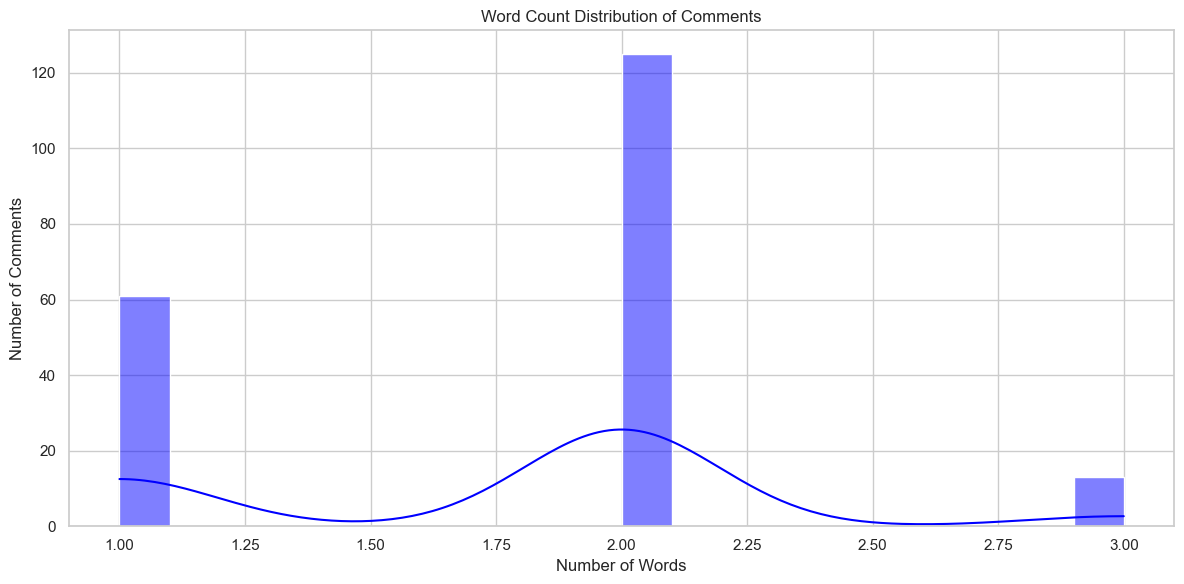

In [17]:
text_col='topics'

# plot the distribution of words
plot_distribution_of_words(df_topics_3, text_col)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 199/199 [01:02<00:00,  3.20it/s]


Using PCA to transformed embeddings


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 38/49 [00:10<00:02,  3.68it/s]

The product of size_min and n_clusters cannot exceed the number of samples.
Terminating the calculation...
The optimum kappa based on Penalized Silhouette score is: 22


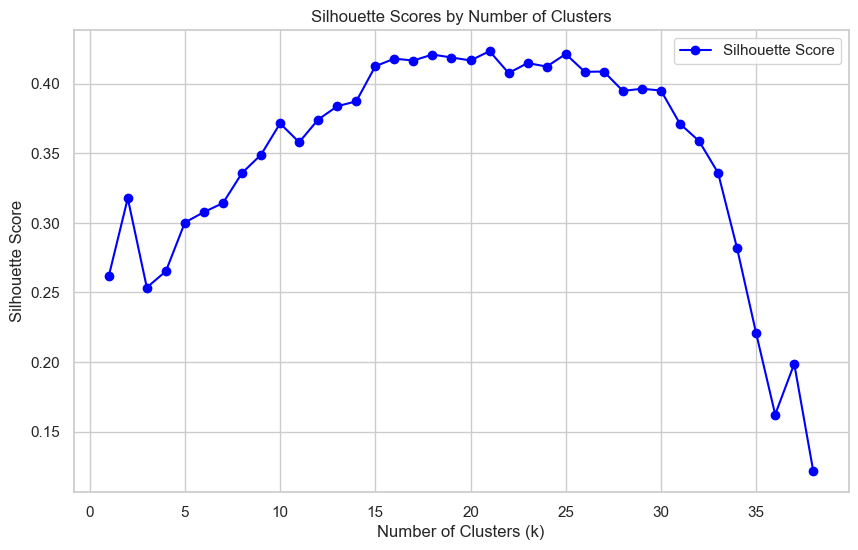

Silhouette score for best kappa: 0.481


In [18]:
from summarization_methods.topic_extraction_clustering_and_summarization import calc_clusters_with_kmeans

# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
df_topics_3, kmeans_results_2 = calc_clusters_with_kmeans(df=df_topics_3, text_col=text_col, max_token_length=4000, is_pca=(True, 16))

In [19]:
# rename the columns and merge the proper
df_sum_3 = df_sum_3.reset_index().rename(columns={'index': 'comment_id'})
df_topics_3 = df_topics_3.rename(columns={'comment': 'comment_id'})

df_topics_3 = df_topics_3.merge(df_sum_3[['content', 'comment_id']], how='inner', on='comment_id')

grouped_comments_3 = df_topics_3.groupby('labels').agg(
    comments=('content', lambda x: list(x)),
    topics=('topics', lambda x: set(x)),
    comments_count=('comment_id', lambda x: len(list(x)))
    )

grouped_comments_3 = grouped_comments_3.reset_index()

In [20]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_4 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [21]:
from summarization_methods.topic_extraction_clustering_and_summarization import summarize_comments_by_cluster

text_col='comments'
language = 'English'
topic = df_topics.iloc[0].topic

# produce the summaries for grouped comments by label
summaries_4 =summarize_comments_by_cluster(df=grouped_comments_3, text_col=text_col, prompt_name=prompt_template_4, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_4 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_comments')

The comments indicate that the target group for the presentation has been decided to be individuals aged fifteen to thirty. Key insights include the importance of focusing on digital market trends, the impact of social media on consumer behavior, and the need to emphasize data-driven strategies. Additionally, there is a consensus on the inclusion of case studies from leading market players to illustrate successful trend adaptations. The comments also suggest a dedicated section on emerging technologies and their potential market disruptions.
The comments primarily express agreement and acknowledgment without substantial new content or detailed insights. The discussion continues to align with previous insights, resonating with the focus on digital market trends, social media impacts on consumer behavior, and data-driven strategies. No additional significant points or divergences were noted.
The comments highlight the need to address the underlying factors behind market trends, emphasizi

In [22]:
from summarization_methods.topic_extraction_clustering_and_summarization import final_summary_of_clustered_comments

# produce the final summary for the 4th technique
final_summary_4 = final_summary_of_clustered_comments(prompt=prompt_template_final_4, gpt_model='gpt-4o', topic=topic, summaries=summaries_4)

The presentation on market trends should target individuals aged fifteen to thirty, with a prime focus on digital market trends and the influence of social media on consumer behavior. It is critical to maintain clarity and simplicity to ensure the content is accessible. Visual aids such as infographics, graphs, and charts are recommended to enhance data comprehension. Including real-world examples and practical applications will improve relatability and understanding. Engaging storytelling techniques and interactive elements like live polls and Q&A sessions are advised to sustain audience interest. Contextualizing trends with historical data and addressing regional differences and specific demographics are essential. Ensuring the accuracy and relevance of data and presenting a balanced view of opportunities and challenges in emerging trends are paramount.


### STORE THE FINAL SUMMARIES IN A CSV

In [23]:
# find the original summary
df_specific_summaries_list = pd.DataFrame(data['specific_query_list'])
print(df_specific_summaries_list.columns)
print('-----------------------------------------------------------------------------------')
print(df_specific_summaries_list)

Index(['query', 'answer', 'relevant_text_span'], dtype='object')
-----------------------------------------------------------------------------------
                                               query  \
0       Summarize the presentation on market trends.   
1  What did Marketing think of technology innovat...   
2  Why did Marketing propose lemon or lime when p...   
3  Summarize the decision discussion about remote...   
4  Why did the group decide not to go for an LCD ...   

                                              answer relevant_text_span  
0  Marketing presented on market trends and sugge...          [[0, 91]]  
1  Marketing mentioned that market research empha...         [[58, 71]]  
2  Because Marketing recommended the group took s...         [[77, 87]]  
3  The group discussed the final remote concepts ...       [[316, 639]]  
4  When discussing the LCD functionality, the gro...       [[395, 431]]  


In [24]:
final_summaries = {
    'original_summary': df_specific_summaries_list.loc[0, 'answer'], 
    'random_grouping_summarization': final_summary_1,
    'label_based_summarization': final_summary_2,
    'cluster_based_summarization': final_summary_3,
    'topic_extraction_cluster_based_summarization': final_summary_4
}

# Convert dictionary to DataFrame, with the keys as 'technique' and values as 'summary'
final_summaries_df = pd.DataFrame.from_dict(final_summaries, orient='index', columns=['summary']).reset_index()
final_summaries_df.rename(columns={'index': 'technique'}, inplace=True)

final_summaries_df.to_csv('outputs/final_summaries.csv', index=False)

In [25]:
final_summaries_df

,technique,summary
0,original_summary,Marketing presented on market trends and sugge...
1,random_grouping_summarization,The final summary of the discussion on market ...
2,label_based_summarization,The comments on the market trends presentation...
3,cluster_based_summarization,The discussion on market trends is characteriz...
4,topic_extraction_cluster_based_summarization,The presentation on market trends should targe...


### BENCMARKING BASED ON THE EXTRACTED SUMMARIES OF THE THREE (3) TECHNIQUES

The evaluation will become by using these metrics: ROUGE score, BLEU score and BERTScore

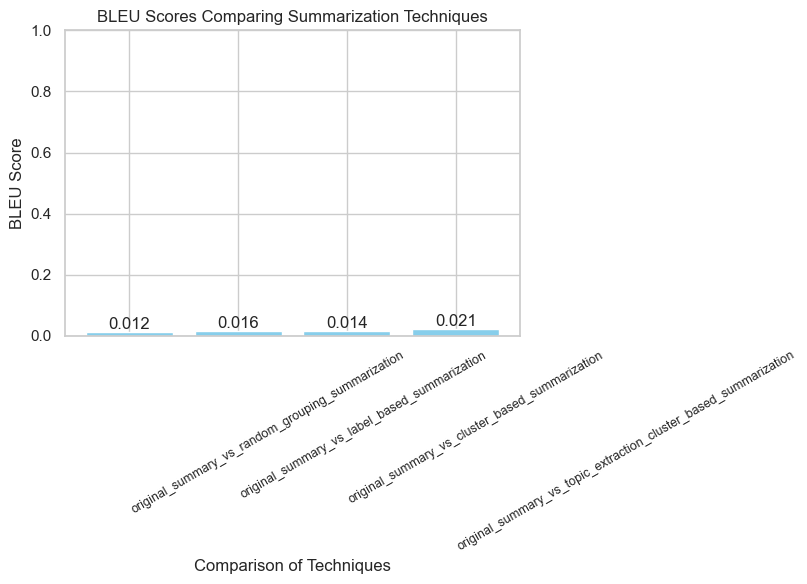

In [26]:
from utils.benchmark_summaries import calc_and_plot_bleu_scores

bleu_scores = calc_and_plot_bleu_scores(summaries_df=final_summaries_df,
                                        text_col='summary', title_col='technique')

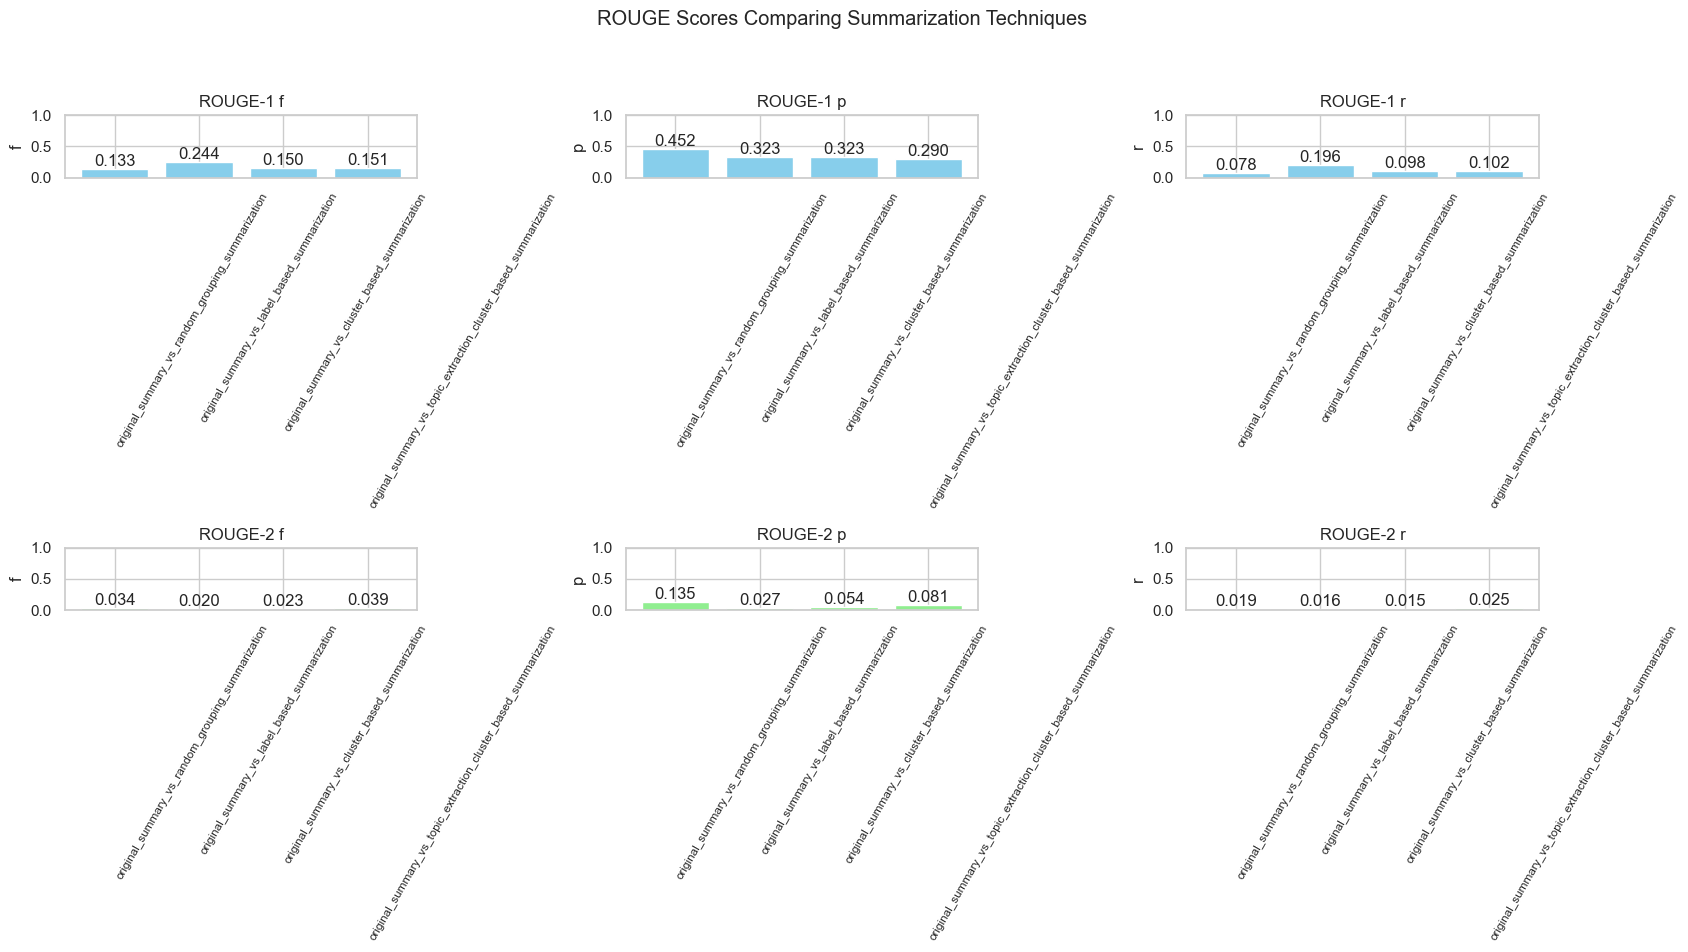

In [27]:
from utils.benchmark_summaries import calc_and_plot_rouge_scores

rouge_scores = calc_and_plot_rouge_scores(summaries_df=final_summaries_df,
                                        text_col='summary', title_col='technique')

C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


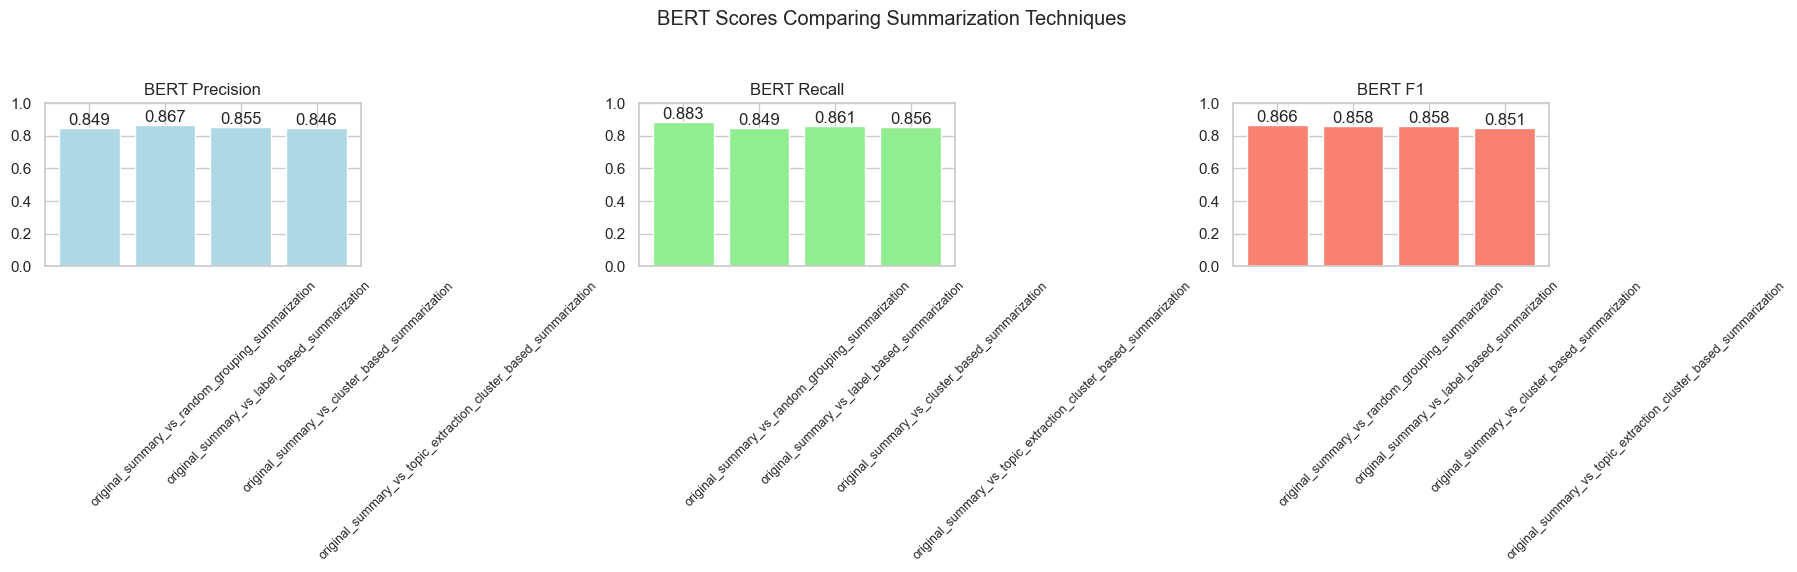

In [28]:
from utils.benchmark_summaries import calc_and_plot_bert_scores

bert_scores = calc_and_plot_bert_scores(summaries_df=final_summaries_df,
                                        text_col='summary',
                                        title_col='technique',
                                        model_to_use='princeton-nlp/sup-simcse-roberta-large',
                                        text_lang='en')